<a href="https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_cartpole.ipynb" 
   target="_parent">
   <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# CartPole Gym environment with TfAgents

## Install packages (gym, tfagents, tensorflow,....)

#### suppress package warnings, prepare matplotlib, if in colab: load additional packages for rendering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip install easyagents >/dev/null

The fc_layers argument defines the policy's neural network architecture. Here we use 3 fully connected layers
with 100 neurons in the first, 50 in the second and 25 in the final layer. 
By default fc_layers=(75,75) is used.

The first argument of the train method is a list of callbacks. Through callbacks we define the plots generated during 
training, the logging behaviour or control training duration. 
By passing [plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()] we add in particular the State() plot, 
depicting the last observation state of the last evaluation episode. plot.Actions() displays a histogram of the 
actions taken for each episode played during the last evaluation period. 

Besides num_iterations there are quite a few parameters to specify the exact training duration (e.g. 
num_episodes_per_iteration, num_epochs_per_iteration, max_steps_per_episode,...).

## Switching the algorithm

Switching from Ppo to Dqn is easy, essentially just replace PpoAgent with DqnAgent (the evaluation may take a few
minuites):

In [4]:
from easyagents.agents import DqnAgent
from easyagents.callbacks import plot

Wall time: 4min 50s


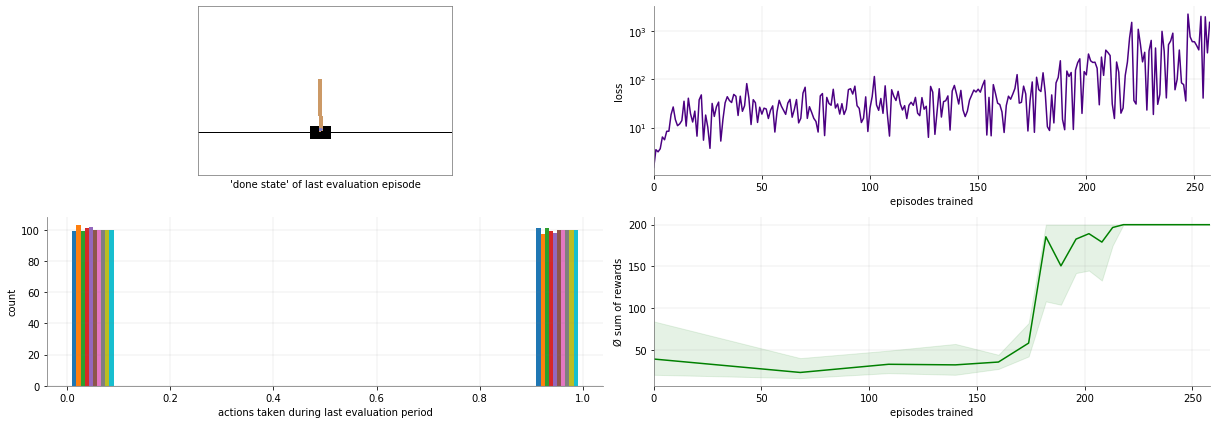

In [6]:
%%time

dqnAgent = DqnAgent('CartPole-v0', fc_layers=(100, ))
dqnAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()], 
               num_iterations=20000, num_iterations_between_eval=1000)

Since Dqn by default only takes 1 step per iteration (and thus an episode spans over several iterations) we increased
the num_iterations parameter.

## Next: custom training, creating a movie & switching backends.

* see 
  [Orso on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_orso.ipynb)
  (an example of a gym environment implementation based on a routing problem)
